## Watershed

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<class 'numpy.uint8'>


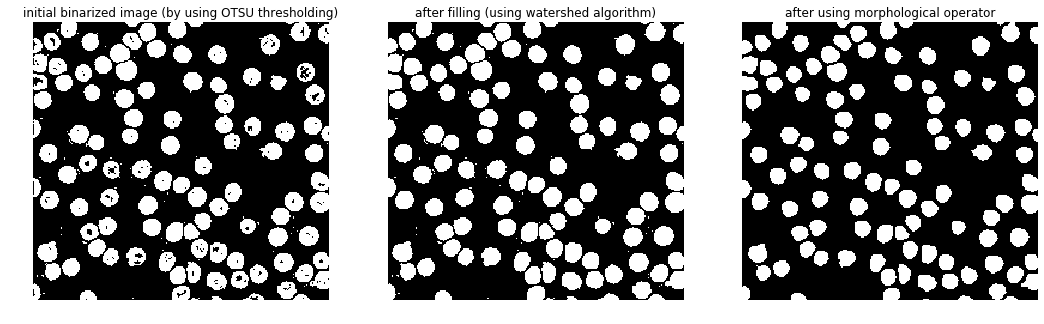

In [412]:
img = cv2.imread('cell_final.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(type(gray[0][0]))
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=[18,6])

plt.subplot(131)
plt.imshow(thresh, cmap = 'gray')
plt.axis('off')
plt.title('initial binarized image (by using OTSU thresholding)')

im_th = thresh.copy()
im_floodfill = im_th.copy()

# Mask used to flood filling.
# NOTE: the size needs to be 2 pixels bigger on each side than the input image
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground
im_out = im_th | im_floodfill_inv

plt.subplot(132)
plt.imshow(im_out, cmap = 'gray')
plt.axis('off')
plt.title('after filling (using watershed algorithm)')


thresh = im_out.copy()
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
thresh = cv2.erode(thresh, ellipse, iterations = 1)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, ellipse, iterations = 1)


plt.subplot(133)
plt.imshow(thresh, cmap = 'gray')
plt.axis('off')
plt.title('after using morphological operator')
plt.show()

In [395]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

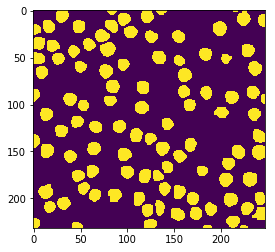

In [387]:
plt.imshow(opening)

In [388]:
# Marker labelling
#ret, markers = cv2.connectedComponents(sure_fg)
ret, markers = cv2.connectedComponents(thresh)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [402]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,0]

In [403]:
from skimage import measure

In [404]:
labels= measure.label(thresh)

In [405]:
props = measure.regionprops(labels)
counter = 1
bounding_box = []
label = []
area = []
centroid = []
eccentricity = []
perimeter = []
major_axis_length = []
for prop in props:
    if prop.area > 50:
        print('Label: {} >> Object size: {}'.format(counter, prop.area))
        counter += 1
        bounding_box.append(prop.bbox)
        label.append(prop.label)
        area.append(prop.area)
        centroid.append(prop.centroid)
        eccentricity.append(prop.eccentricity)
        perimeter.append(prop.perimeter)
        major_axis_length.append(prop.major_axis_length)

Label: 1 >> Object size: 153
Label: 2 >> Object size: 168
Label: 3 >> Object size: 189
Label: 4 >> Object size: 150
Label: 5 >> Object size: 85
Label: 6 >> Object size: 135
Label: 7 >> Object size: 144
Label: 8 >> Object size: 141
Label: 9 >> Object size: 186
Label: 10 >> Object size: 81
Label: 11 >> Object size: 161
Label: 12 >> Object size: 177
Label: 13 >> Object size: 149
Label: 14 >> Object size: 157
Label: 15 >> Object size: 158
Label: 16 >> Object size: 146
Label: 17 >> Object size: 149
Label: 18 >> Object size: 206
Label: 19 >> Object size: 167
Label: 20 >> Object size: 136
Label: 21 >> Object size: 154
Label: 22 >> Object size: 169
Label: 23 >> Object size: 140
Label: 24 >> Object size: 138
Label: 25 >> Object size: 94
Label: 26 >> Object size: 118
Label: 27 >> Object size: 135
Label: 28 >> Object size: 124
Label: 29 >> Object size: 185
Label: 30 >> Object size: 170
Label: 31 >> Object size: 144
Label: 32 >> Object size: 178
Label: 33 >> Object size: 162
Label: 34 >> Object si

In [406]:
print('mean area:', np.mean(area), '+/-', np.std(area, dtype=np.float64))
print('mean eccentricity:', np.mean(eccentricity))
print('mean perimeter:', np.mean(perimeter))
print('mean major axis length:', np.mean(major_axis_length))

mean area: 148.01020408163265 +/- 26.637588486319736
mean eccentricity: 0.41848645192192646
mean perimeter: 43.31487098736725
mean major axis length: 14.636994791414343


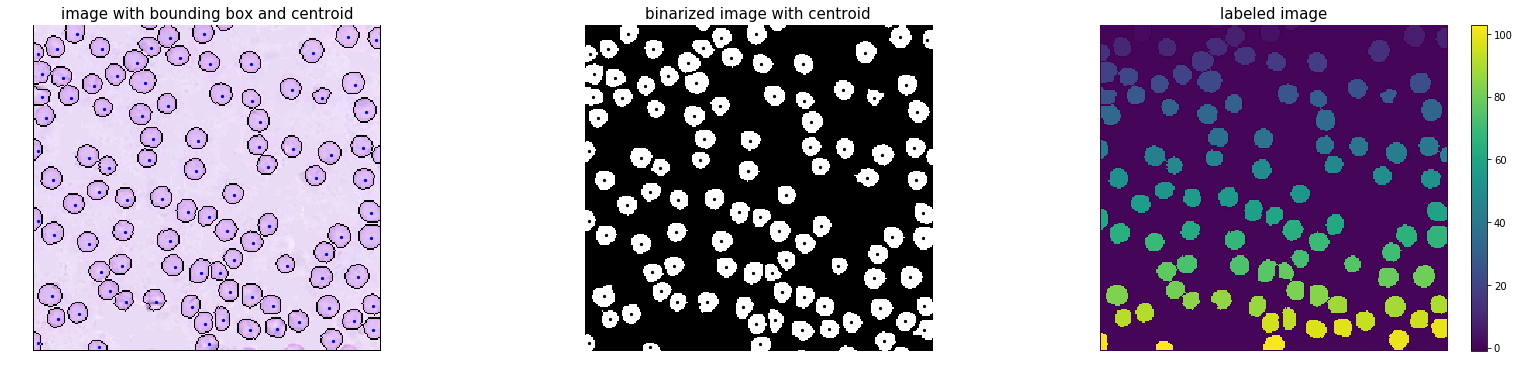

In [410]:
c_x = np.array([i[1] for i in centroid])
c_y = np.array([i[0] for i in centroid])

plt.figure(figsize=[28,6])
plt.subplot(131)
plt.imshow(img)
plt.scatter(c_x, c_y, s = 5, color='blue')
plt.title('image with bounding box and centroid', fontsize=15)
plt.axis('off')


plt.subplot(132)
plt.imshow(thresh, cmap = 'gray')
plt.scatter(c_x, c_y, s = 5, color = '(0,0,0)')
plt.title('binarized image with centroid', fontsize=15)
plt.axis('off')

plt.subplot(133)
plt.imshow(markers)
plt.colorbar()
plt.axis('off')
plt.title('labeled image', fontsize=15)
plt.show()

In [413]:
skimage?

Object `skimage` not found.


In [414]:
import skimage

In [416]:
skimage.__version__

'0.14.2'

In [417]:
centroid

[(5.895424836601308, 30.627450980392158),
 (6.357142857142857, 121.27380952380952),
 (8.476190476190476, 223.68783068783068),
 (9.04, 96.46666666666667),
 (10.31764705882353, 243.34117647058824),
 (16.977777777777778, 16.340740740740742),
 (17.13888888888889, 48.416666666666664),
 (16.43262411347518, 83.47517730496453),
 (19.467741935483872, 198.59677419354838),
 (20.444444444444443, 3.2098765432098766),
 (22.987577639751553, 103.68944099378882),
 (26.7909604519774, 72.99435028248588),
 (27.644295302013422, 125.30201342281879),
 (27.713375796178344, 154.5796178343949),
 (34.962025316455694, 5.848101265822785),
 (36.34931506849315, 59.0958904109589),
 (37.7248322147651, 20.798657718120804),
 (41.24271844660194, 78.9368932038835),
 (42.52095808383233, 228.14970059880238),
 (43.213235294117645, 42.76470588235294),
 (46.25974025974026, 183.32467532467533),
 (50.18934911242604, 134.03550295857988),
 (51.00714285714286, 5.45),
 (51.405797101449274, 26.32608695652174),
 (51.351063829787236, 2